In [ ]:
pip install praw

In [ ]:
pip install config

In [ ]:
import re #expressão regular "filtrar o texto"
import praw
import config
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Caregando os dados
assuntos = ['datascience', 'machinelearning', 'physics', 'astrology', 'conspiracy']
def carregar_dados():
  api_reddit = praw.Reddit(
    client_id="A8D2OnAmGiswz6hKETghFg",
    client_secret="nPdSAHl7Aj8d3dUwloAE214M9CC8KA",
    password="Lhs202gbnd@!#!",
    user_agent="Scraping-app",
    username="MovePrize3040",
)
  #contamos o numeros de caracteres usando expressão regulares
  char_count = lambda post: len(re.sub('\W|d', '', post.selftext))
  #definimos a condição para filtrar os posts
  mask = lambda post: char_count(post) >= 100
  #lista de resultados
  data = []
  labels = []

  for i, assunto in enumerate(assuntos):
    #extrai os post
    subreddit_data = api_reddit.subreddit(assunto).new(limit=1000)
    #Filtra post que nao sastifazem a condição
    post = [post.selftext for post in filter(mask, subreddit_data)]

    #adiciona os posts e labels as linhas
    data.extend(post)
    labels.extend([i]*len(post))

    print(f"Numero de posts do assunto r/{assunto}:")
    print(f"Um dos posts extraídos: {post[0][:600]}...")  # Mostra os primeiros 600 caracteres
    print("_" * 80)

  return data, labels

In [ ]:
##Divisão de dados em treino e teste

TEST_SIZE = .2 # tamanho do conjunto de dados de teste .2 indica 20% dos dados vao para teste
RANDOM_STATE = 0

def slipt_data():
  print(f"Split {100 * TEST_SIZE}% dos dados para treinamento e avaliação do modelo...")

  X_treino, X_teste, y_treino, y_teste = train_test_split(data,labels,test_size = TEST_SIZE, random_state = RANDOM_STATE)

  print(f"{len(y_teste)} amostra de teste;.")

  return X_treino, X_teste, y_treino, y_teste

In [ ]:
##Pre processamento dos dados
#remove simbolos, números e strings semelhantes a url com pré processador personalizaodo
#vetoriza texto usando o termo frequencia inversa de frequencia de documento
#reduz para valores principais usando decomposição de valor singular
#particiona os dados e rotulos em conjutos de treinamento / validação

#variaveis de controle
MIN_DOC_FREQ = 1
N_COMPONENTS = 1000
N_ITER = 30

#FUNÇÃO PARA O PIPELINE DE PRÉ PROCESSAMENTO
def preprocessing_pipeline():
  #remove os caracteres não alfabeticos
  pattern = r'\W|\d|http.*\s+|www.*\s+'
  preprocessor = lambda text: re.sub(pattern,' ', text)

  #vectorize TF-IDF
  vectorizer = TfidfVectorizer(preprocessor = preprocessor, stop_words = 'english', min_df = MIN_DOC_FREQ)

  #Reduzindo a dimensionalidade da matriz TF-IDF
  decomposition = TruncatedSVD(n_components = N_COMPONENTS, n_iter = N_ITER)

  #Pipeline
  pipeline = [('tfidf', vectorizer), ('svd', decomposition)]

  return pipeline

In [ ]:
#variaveis de controle
N_NEIGHBORS = 4
CV = 3

##cria modelo

def cria_modelos():
  modelo_1 = KNeighborsClassifier(n_neighbors = N_NEIGHBORS)
  modelo_2 = RandomForestClassifier(random_state = RANDOM_STATE)
  modelo_3 = LogisticRegressionCV(cv = CV, random_state = RANDOM_STATE)

  modelos = [("KNN",modelo_1), ("Random forest", modelo_2), ("LogReg", modelo_3)]
  return modelos

In [ ]:
## treinamento e avaliação do modelo

def treina_avalia(modelos,pipeline,X_treino, X_teste, y_treino, y_teste):
  resultados = []

  #loop
  for name,modelo in modelos:
    #pipeline
    pipe = Pipeline(pipeline + [(name, modelo)])

    #treinamento
    print(f'Treinando o modelo {name} com dados de treino...')
    pipe.fit(X_treino, y_treino)

    #previsão com dados de teste
    y_pred = pipe.predict(X_teste)

    #calcula metricas
    report = classification_report(y_teste, y_pred)
    print("relatorio de classificação\n", report)

    resultados.append([modelo,{'modelo':name, 'previsões':y_pred, 'report':report,}])

  return resultados

In [ ]:
##execultando pipeline para todos os modelos
if __name__ == '__main__':
  data, labels = carregar_dados()

  X_treino, X_teste, y_treino, y_teste = slipt_data()

  pipeline = preprocessing_pipeline()

  modelos = cria_modelos()

  resultados = treina_avalia(modelos,pipeline,X_treino, X_teste, y_treino, y_teste)
  print("Concluido com sucesso")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Numero de posts do assunto r/datascience:
Um dos posts extraídos: Aside from soft skills and domain expertise, ofc those are a given.

I'm manufacturing-adjacent (closer to product development and validation). Design of experiments has been my most useful data-related skill. I'm always being asked "We are doing test X to validate our process. Can you propose how to do it with less runs?" Most of the other engineers in our team are familiar with the concept of DoE but aren't confident enough to generate or analyze it themselves, which is where my role typically falls into....
________________________________________________________________________________


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Numero de posts do assunto r/machinelearning:
Um dos posts extraídos: A common (and frustrating) issue in deep RL: agents suddenly plateau or even regress during training, despite continued updates and exploration.

This new survey proposes that **plasticity loss** may be a core culprit. As training progresses, networks can lose their ability to adapt, not just overfit, but literally become less trainable. The paper connects this phenomenon to:

* Saturated neurons and dormant units
* Effective rank collapse
* High replay ratios and regression losses
* Sharp loss landscapes and parameter norm growth
* Non-stationarity in both inputs and targets

It also categori...
________________________________________________________________________________


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Numero de posts do assunto r/physics:
Um dos posts extraídos: **Intro:**  
I’m struggling with something about how acoustic energy is handled in standard physics, especially when considering what’s actually happening at the particle level in air.

**TL;DR:**  
If you take all the energy that’s “spread out” in the standard acoustic formula and localize it just to the actual air molecules, you end up with a calculated particle velocity around 2000 m/s—which is way above the speed of sound and seems totally unphysical. Where’s my logic wrong, or is the standard approach just an abstraction with no direct microscopic meaning?

**Full issue and reasoning:**

...
________________________________________________________________________________


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Numero de posts do assunto r/astrology:
Um dos posts extraídos: I tried using [astroseek.com](http://astroseek.com) and [astro.com](http://astro.com) but i don'tknow if its because i don't know how to use it or if its not availible but can someone help?...
________________________________________________________________________________


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Numero de posts do assunto r/conspiracy:
Um dos posts extraídos: This argument is so fucking dumb. And Dems always bring up. We didn’t steal anyone’s land. We bought our territory. Seriously stop using Dem talking points and learn some History. ...
________________________________________________________________________________
Split 20.0% dos dados para treinamento e avaliação do modelo...
620 amostra de teste;.
Treinando o modelo KNN com dados de treino...
relatorio de classificação
               precision    recall  f1-score   support

           0       0.57      0.88      0.69       129
           1       0.78      0.71      0.74       150
           2       0.83      0.70      0.76       122
           3       0.94      0.82      0.88        94
           4       0.88      0.70      0.78       125

    accuracy                           0.76       620
   macro avg       0.80      0.76      0.77       620
weighted avg       0.79      0.76      0.76       620

Treinando o modelo R

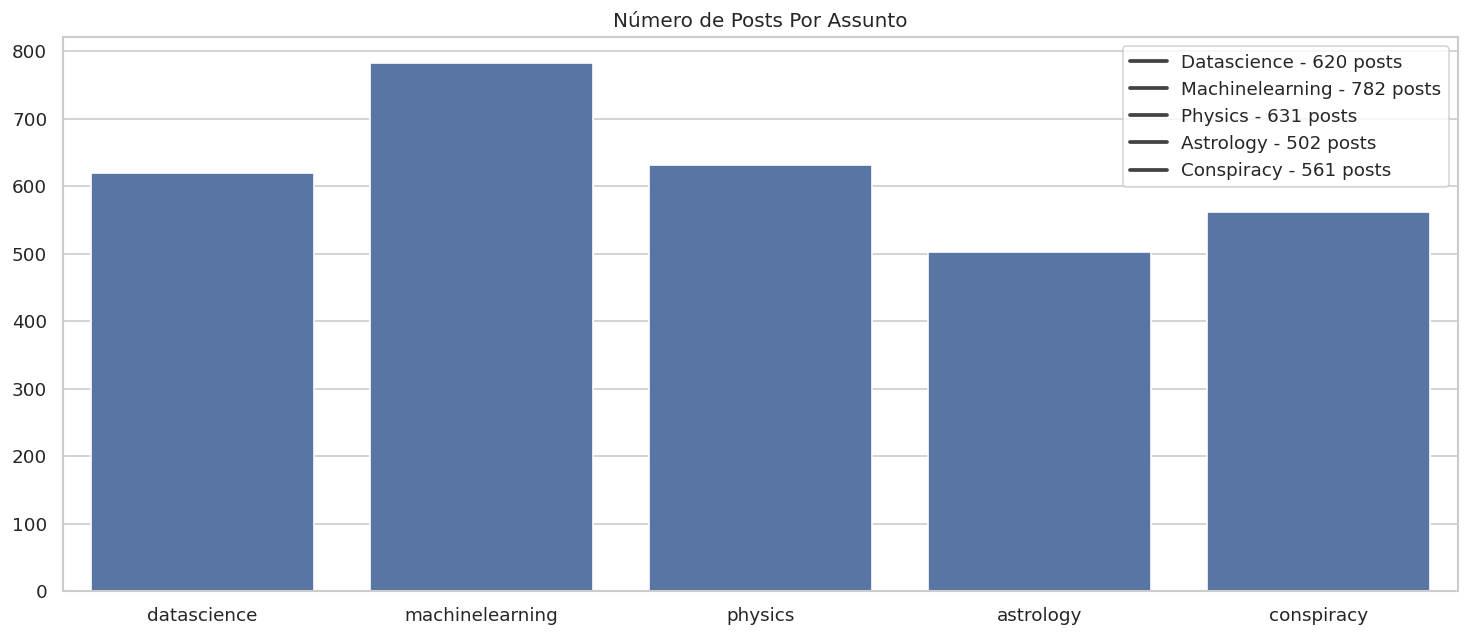

Relatório de Classificação
               precision    recall  f1-score   support

           0       0.57      0.88      0.69       129
           1       0.78      0.71      0.74       150
           2       0.83      0.70      0.76       122
           3       0.94      0.82      0.88        94
           4       0.88      0.70      0.78       125

    accuracy                           0.76       620
   macro avg       0.80      0.76      0.77       620
weighted avg       0.79      0.76      0.76       620



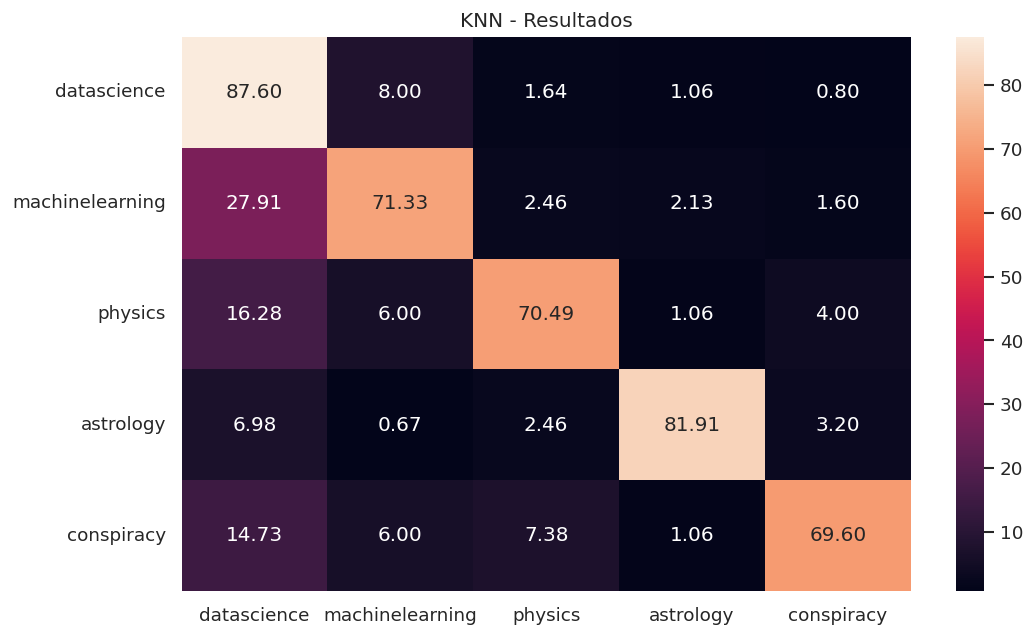

Relatório de Classificação
               precision    recall  f1-score   support

           0       0.87      0.72      0.79       129
           1       0.75      0.90      0.82       150
           2       0.86      0.86      0.86       122
           3       0.99      0.80      0.88        94
           4       0.85      0.92      0.88       125

    accuracy                           0.84       620
   macro avg       0.86      0.84      0.85       620
weighted avg       0.85      0.84      0.84       620



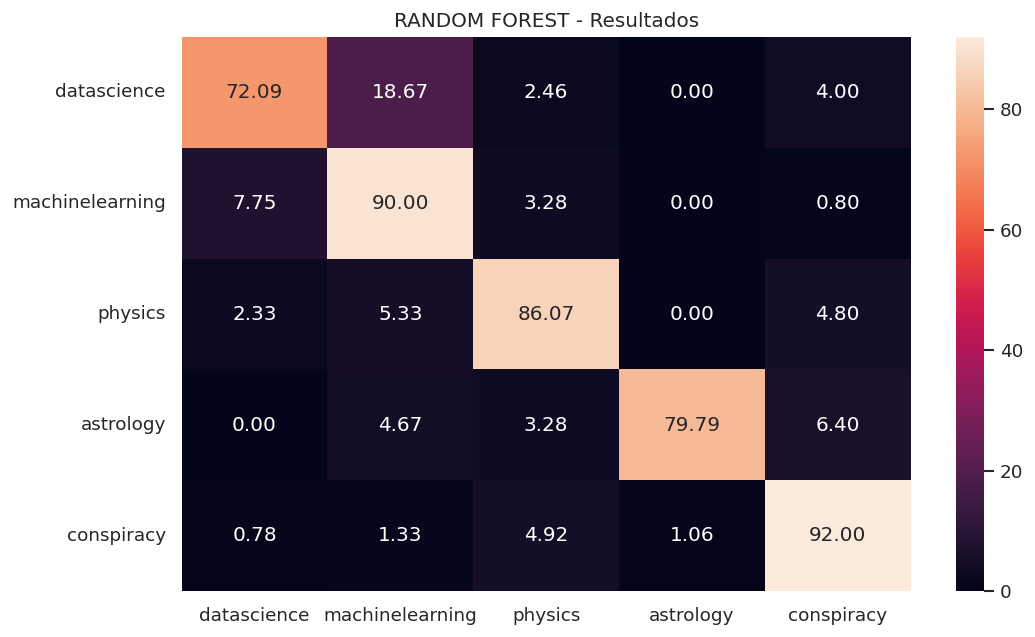

Relatório de Classificação
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       129
           1       0.85      0.88      0.86       150
           2       0.89      0.89      0.89       122
           3       0.99      0.86      0.92        94
           4       0.88      0.96      0.92       125

    accuracy                           0.89       620
   macro avg       0.90      0.89      0.89       620
weighted avg       0.89      0.89      0.89       620



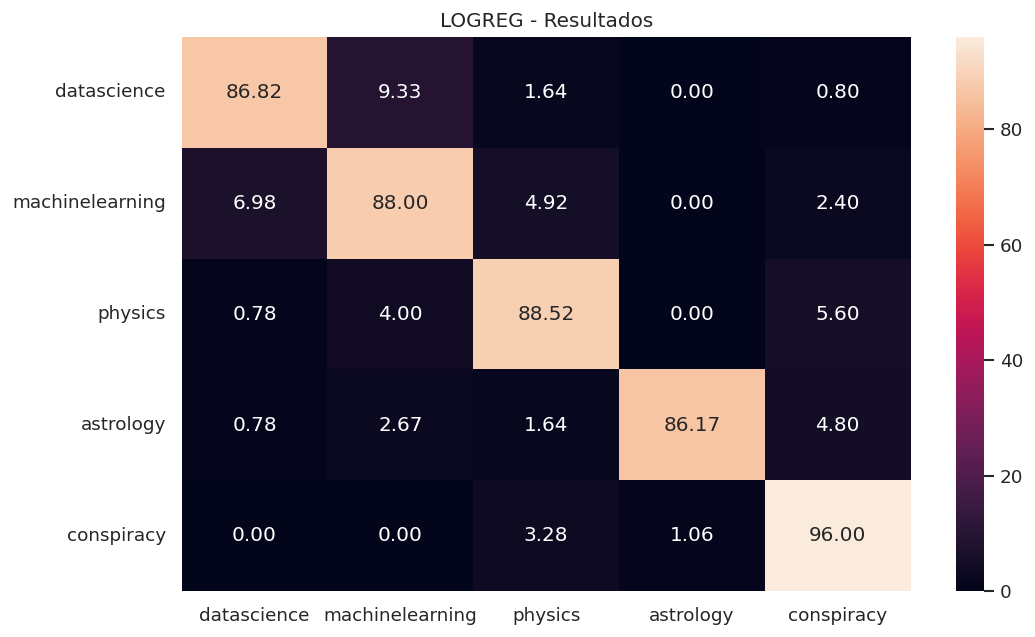

In [ ]:
# Visualizando os Resultados
def plot_distribution():
    _, counts = np.unique(labels, return_counts=True)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(15, 6), dpi=120)
    plt.title("Número de Posts Por Assunto")
    sns.barplot(x=assuntos, y=counts)
    plt.legend([' - '.join([f.title(), f"{c} posts"]) for f, c in zip(assuntos, counts)])
    plt.show()

def plot_confusion(result):
    print("Relatório de Classificação\n", result[-1]['report'])
    y_pred = result[-1]['previsões']
    conf_matrix = confusion_matrix(y_teste, y_pred)
    _, test_counts = np.unique(y_teste, return_counts=True)
    conf_matrix_percent = conf_matrix / test_counts.transpose() * 100
    plt.figure(figsize=(9.8, 6), dpi=120)
    plt.title(result[-1]['modelo'].upper() + " - Resultados")
    plt.xlabel("Valor Real")
    plt.ylabel("Previsto pelo Modelo")
    ticklabels = [f"{sub}" for sub in assuntos]
    sns.heatmap(data=conf_matrix_percent, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='.2f')
    plt.show()

# Gráfico de avaliação
plot_distribution()

# Resultado do KNN
plot_confusion(resultados[0])

# Resultado do random forest
plot_confusion(resultados[1])

# Resultado do LogReg
plot_confusion(resultados[2])